### Installation and code editors


- CRAN
- RStudio

### Variables, types, data structures

In R, each variable is assigned an "R Object" whose type matches that of the data contained in it.  Some common R objects are:
- *vectors*: the simplest data structure; a scalar variable in R is a vector of length 1. There are six types of vectors (sometimes referred to as the "atomic types"): `logical`, `numeric`, `integer`, `complex`, `character`, and `raw`.  All real numbers in R are stored in double-precision format.
- *factors*: object for representing the levels (in the form of strings or integers) of a categorical variable
- *lists*: collections of named elements which can be of different types
- *matrices*: elements of the same atomic type are arranged in two-dimensional, rectangular layout; dimensions can be given names
- *arrays*: multidimensional data structure of the same atomic type, i.e. a collection of matrices
- *data frames*: table/2D array-like structure in which each column stores values of one variable, and each row corresponds to one observation

In [1]:
# Vectors
a = c(1,2,3) 
b = c(4,5,6)  
d = c("a","b","c")

# Combining vectors
cbind(a,b,d)
rbind(a,b,d)

a,b,d
1,4,a
2,5,b
3,6,c


a,1,2,3
b,4,5,6
d,a,b,c


In [2]:
# Lists
e = list(x = "R", y = c("is", "fun"), z = pi)
e$x
str(e)
unlist(e)  # Simplify the list to a vector of type 'character'

[1] "R"

List of 3
 $ x: chr "R"
 $ y: chr [1:2] "is" "fun"
 $ z: num 3.14


[1] "character"

In [3]:
# Matrices
f = matrix(1:9, nrow = 3, ncol = 3)
det(f)     # Right answer is 0. Matlab says this determinant is 6.6613e-16 ...
eigen(f)   # The third eigenvalue should be 0 (Matlab got this right) ...

[1] 0

-0.4645473,-0.8829060,0.4082483
-0.5707955,-0.2395204,-0.8164966
-0.6770438,0.4038651,0.4082483


In [4]:
# Data frames 
# (these numbers are the thousands of pounds of mozzarella cheese produced in the US in each month of 1973 and 2004)
mc1973 = c(30843, 27752, 31557, 31089, 35222, 33587, 31418, 30129, 27327, 31383, 30430, 34031)
mc2004 = c(215333, 204911, 226643, 222094, 242950, 222523, 214999, 216362, 214577, 217289, 211547, 225771)
q = data.frame(production1973 = mc1973, production2004 = mc2004)
summary(q)
mean(q$production1973)

 production1973  production2004  
 Min.   :27327   Min.   :204911  
 1st Qu.:30355   1st Qu.:214894  
 Median :31236   Median :216826  
 Mean   :31231   Mean   :219583  
 3rd Qu.:32064   3rd Qu.:223335  
 Max.   :35222   Max.   :242950  

[1] 31230.67

### Sampling and probability

Probability distributions supported by R: beta, binomial, Cauchy, exponential, chi-squared, Fisher's F, gamma, geometric, hypergeometric, lognormal, logistic, negative binomial, normal, Poisson, Wilcoxon signed rank, Student's t, uniform, Weibull, Wilcoxon rank sum.

For each of these distributions, the following functions are available:
- `r{distName}`: random number generator
- `p{distName}`: cumulative probability function
- `d{distName}`: probability density/mass function
- `q{distName}`: quantile function

**Example 1:** Draw a normal distribution with mean = 100, standard deviation = 10; shade part of distribution from x = 60 to x = 90

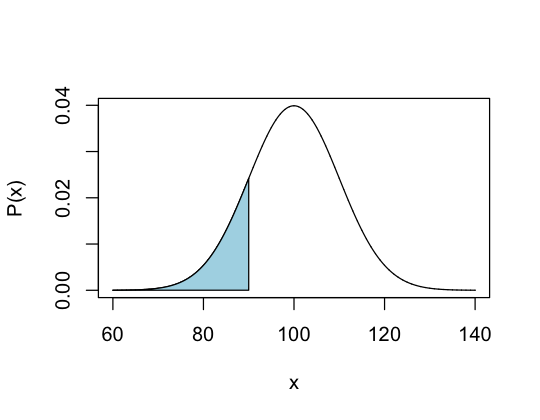

In [5]:
x = seq(60, 140, 0.01)

library(repr);  options(repr.plot.width=4.5, repr.plot.height=3.5)
plot(x, dnorm(x, mean=100, sd = 10), type="l", xlab="x", ylab="P(x)")

xRegion = seq(60, 90, 0.01)
pRegion = dnorm(xRegion, mean=100, sd = 10)
polygon(c(xRegion, 90, 60), c(pRegion, min(pRegion), min(pRegion)), col = "lightblue")

**Example 2**: Draw a histogram of exponential random numbers and plot its probability density function, cumulative distribution function, and quantile (inverse CDF) function

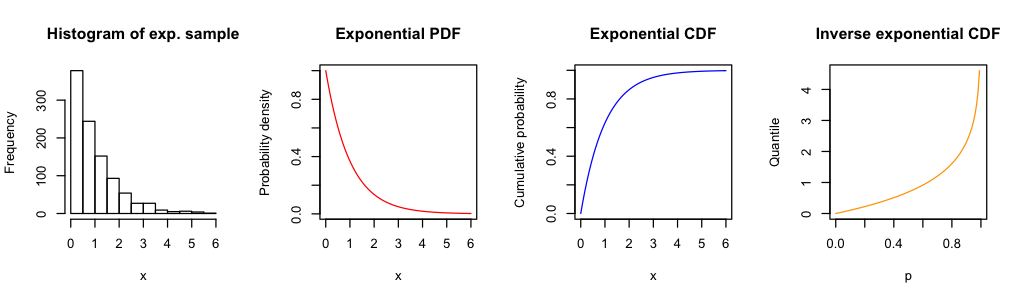

In [6]:
# Graphics commands (the first arranges the plots in a 1x4 grid)
par(mfrow=c(1,4));  options(repr.plot.width=8.5, repr.plot.height=2.5)

hist(rexp(1000), xlab="x", ylab="Frequency", main="Histogram of exp. sample")
curve(dexp, 0, 6, xlab="x", ylab="Probability density", main="Exponential PDF", col="red")
curve(pexp, 0, 6, xlab="x", ylab="Cumulative probability", main="Exponential CDF", col="blue")
curve(qexp, 0, 1, xlab="p", ylab="Quantile", main="Inverse exponential CDF", col="orange",)

**Example 3**: Multivariate normal distribution

In [7]:
library(MASS);  options(repr.plot.width=4.5, repr.plot.height=3.5)
biNormal <- mvrnorm(1000, mu = c(0, 0), Sigma = matrix(c(1, 0, 0, 1), 2))
biNormal <- kde2d(biNormal[,1], biNormal[,2], n = 50)  # Kernel density estimate

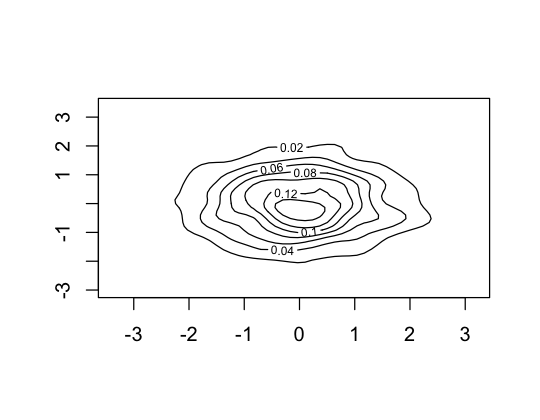

In [8]:
contour(biNormal)

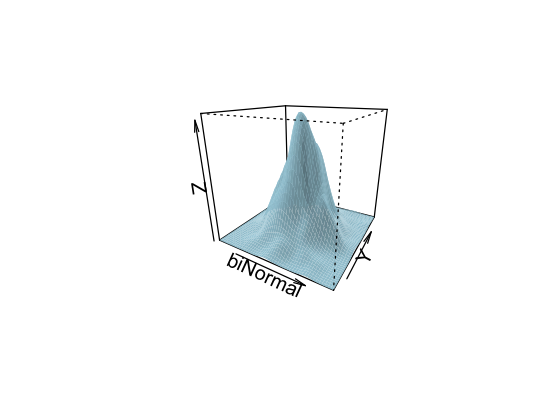

In [9]:
persp(biNormal, phi = 20, theta = 30, shade = .1, col = "lightblue", border = NA)

### Functional programming

A nice feature of R is "first-class functions": functions in R can be arguments to other functions, returned by other functions, and stored in data structures. 

The `*apply()` family of functions are composite functions, i.e. they accept a function `f` as an argument and apply `f` to every element of a data structure `x`:
- `apply(x, margin, fun, ...)` applies `f` to every element in `x`, on the dimension given by `margin` (i.e. `f` is applied to: rows if `margin` is 1, columns if `margin` is 2, both if `margin` is `c(1,2)`)
- `lapply(f, x, ...)` applies `f` to every element of `x` and returns a list with the same number of elements as`x`
- `sapply(f, x, ...)` works in the same way as `lapply`, but returns the most elementary data structure possible (the `s` stands for "simplify"), which is often a vector
- `tapply(x, groupVariable, f, ...)` groups values in `x` by unique values of `groupVariable` and applies `f` to each group
- `mapply(f, x1, x2, ...)` applies `f` to each element of structures `x1`, `x2`, ... (the `m` stands for "multivariate"); see the numerical integration example below for a demonstration

In each of these functions, `...` can be substituted with additional arguments to `f`.


**Example 1**: Numerical integration using the (composite) Simpson's rule, which approximates an integral as:
$$\int_a^b f(x)dx \approx \frac{b-a}{6}\left[ f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right ]$$


R code to approximate $\int_0^{\pi} \text{sin}(x)dx $  (the exact answer is 2):

In [10]:
# Define a function to compute an integral using Simpson's rule
simpson = function(f, a, b) {  (b-a)/6 * (f(a) + 4*f((a + b)/2) + f(b))  }

In [11]:
simpson(sin, 0, pi)   # Not a very good approximation

[1] 2.094395

In [12]:
# Divide [0,pi] into 50 sub-intervals
int = seq(0, pi, length.out=51)

# Apply Simpson's rule to each sub-interval and sum together the 50 results - (somewhat) better!
sum( mapply(function(a,b) simpson(sin,a,b), int[-length(int)], int[-1]) )

[1] 2

`int` is a vector of length 51.  The above line of code works as follows:
- `int[-length(int)]`  returns `int[1:50]`
- `int[-1]` returns `int[2:51]`
- `mapply` is the "multivariate apply" function.  For example, if `f` is a function which takes 2 arguments (in general, `f` can take any number of arguments) and `vec1`, `vec2` are vectors of length $n$, then `mapply(f, vec1, vec2)` calls `f` on each corresponding pair of elements from `vec1` and `vec2`.  That is, the result is a vector containing `f(vec1[1], vec2[1])`,  `f(vec1[2], vec2[2])`, ..., `f(vec1[n], vec2[n])`.
- Therefore, the use of `mapply` here results in a vector containing: `simpson(sin, int[1], int[2])`, `simpson(sin, int[2], int[3])`, ..., `simpson(sin, int[50], int[51]`.
- The `mapply` call is surrounded by the `sum` function so that the results of each call to the `simpson` function are summed together.

**Example 2:** Anonymous functions and mathematical functions which take other functions as arguments

### **Tabulating data**

There are multiple functions in the R base package and elsewhere for grouping data based on one or more variables, as well as for constructing frequency and contingency tables. Useful functions include:
- The `*apply` family of functions (see previous section)
- `ddply` (package: `plyr`): 
- `table` (package: `base`):
- `aggregate` (package: `base`):

The ``summary`` function can also be used to obtain descriptive statistics (quartiles, mean, minimum, maximum) for each variable in a data table.

**Example 1:** On which day of the year were more children born in the US than on any other day? (For each year in 2000-2014)

In [13]:
library(plyr)

# Read data
births2000_2014 = read.csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv", header=TRUE)

birthdays = ddply(births2000_2014, "year", subset, births==max(births))

# Print results neatly
formattedBirthdays = apply(birthdays, 1, function(x) { cat(x[1], ":", month.abb[x[2]], x[3], fill=TRUE) })

2000 : Nov 21
2001 : Dec 28
2002 : Sep 12
2003 : Dec 30
2004 : Sep 9
2005 : Sep 7
2006 : Sep 7
2007 : Dec 27
2008 : Dec 30
2009 : Sep 9
2010 : Dec 21
2011 : Nov 11
2012 : Dec 12
2013 : Sep 4
2014 : Sep 3


**Example 2:** Which states have had the most university commencement addresses given by US presidents?

In [14]:
commencementSpeeches = read.csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/presidential-commencement-speeches/commencement_speeches.csv", header = TRUE)
tail(sort(table(commencementSpeeches$state)))


CO TX CT NY DC MD 
 9 11 12 13 14 17 

**Example 3:** Do people who care a lot about grammar also tend to care a lot about the Oxford comma?

In [15]:
commas = read.csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/comma-survey-data/comma-survey-data.csv", 
    header = TRUE) 

# How important is grammar to the respondent? 
# Possible answers: "Not at all", "Not much", "Some", "A lot"
commaImportance = ordered(commas[,4], levels = c("Not at all", "Not much", "Some", "A lot"))

# How important is the Oxford comma to the respondent? 
grammarImportance = ordered(commas[,8], levels = c("", "Very unimportant", "Somewhat unimportant", 
                                        "Neither important nor unimportant (neutral)", 
                                        "Somewhat important", "Very important"))

table(grammarImportance, commaImportance)

                                             commaImportance
grammarImportance                             Not at all Not much Some A lot
                                                       8       14   12     6
  Very unimportant                                     2        2    1     0
  Somewhat unimportant                                 1        4    1     1
  Neither important nor unimportant (neutral)         10        9    6     1
  Somewhat important                                  54      118  127    34
  Very important                                      51      121  267   249

### Linear/nonlinear statistical models

### **Statistical tests**

Many functions are available in R for performing a wide range of statistical tests.  A few of the popular functions are:
- `t.test`:
- `shapiro.test`:
- `var.test`:

**Example 1**: Is there a statistically significant difference between the number of American newspapers circulating in 2004 and 2013?

In [16]:
newspapers = read.csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/pulitzer/pulitzer-circulation-data.csv", header=T)
circulation2004 = as.numeric(gsub(",", "", newspapers$Daily.Circulation..2004))
circulation2013 = as.numeric(gsub(",", "", newspapers$Daily.Circulation..2013))

In [17]:
# Paired t-test:
t.test(circulation2004, circulation2013, paired = TRUE, conf.level = 0.95)


	Paired t-test

data:  circulation2004 and circulation2013
t = 4.1441, df = 49, p-value = 0.0001346
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  51485.89 148431.91
sample estimates:
mean of the differences 
                99958.9 


In [18]:
# Paired t-test with null hypothesis that readership in 2013 was less (i.e. 2004-2013 > 0)
t.test(circulation2004, circulation2013, paired = TRUE, alternative = "greater")


	Paired t-test

data:  circulation2004 and circulation2013
t = 4.1441, df = 49, p-value = 6.729e-05
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 59518.77      Inf
sample estimates:
mean of the differences 
                99958.9 


### **Model selection**

Using 'tidyverse' packages to reshape a large, complex dataset: 
What proportion of the New York Philarmonic's performances have been Beethoven, Mozart, or Mendelssohn pieces, from 1842-2016?

In [ ]:
library(plyr);  library(tidyverse);  library(reshape2);  options(warn=-1);  library(jsonlite)
NYPhil1842 = fromJSON("https://raw.githubusercontent.com/nyphilarchive/PerformanceHistory/master/Programs/json/complete.json")
seasons = (NYPhil1842 %>% map("season"))$programs
composers = (NYPhil1842 %>% map("works"))$programs %>% map("composerName")

beethovenCount = unlist(composers %>% map(~ sum(str_count(na.omit(.), "Beethoven"))))
mozartCount = unlist(composers %>% map(~ sum(str_count(na.omit(.), "Mozart"))))
mendelssohnCount = unlist(composers %>% map(~ sum(str_count(na.omit(.), "Mendelssohn"))))

pieceCount = unlist(composers %>% map(~ length(na.omit(.))))

composersBySeason <- data_frame(season = seasons, pieceCount = pieceCount, beethoven = beethovenCount, 
                                mozart = mozartCount, mendelssohn = mendelssohnCount)

composersBySeason = plyr::ddply(composersBySeason,"seasons",numcolwise(sum))
composersBySeason[,3:5] = composersBySeason[,3:5]/composersBySeason$pieceCount

composersBySeasonLong = melt(composersBySeason[-NROW(composersBySeason),-2], id="seasons")

library(repr);  options(repr.plot.width=7, repr.plot.height=4)
p1 = ggplot(data=composersBySeasonLong,  aes(x=seasons, y=value, color=variable, group=variable)) + 
            geom_line() + theme(axis.text.x = element_text(size=5, angle=90))
print(p1)

### Performant code

Rcpp, profiling